## Importando as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

## Execução da Tarefa

### Funções Utilizadas

In [48]:
#Funcao simples que mostra uma imagem na tela
def show_img(image):
    plt.figure()
    plt.imshow(image)

#Retorna os dados de uma image(Altura, largura e canais de cores)
def get_data_img(image):
    alt_img = img.shape[0]
    larg_img = img.shape[1]
    can_cor_img = img.shape[2]
    
    return alt_img, larg_img, can_cor_img
    
def show_data_img(altura, largura, canal_cor):
    print("Altura: %.2f" %altura)
    print("Largura: %.2f" %largura)
    print("Canais de cor: %d" %canal_cor)
    

'''
Encontra o valor do limite para ser usado na transformacao de Hough,
dado a quantidade de linhas que quero dentro de uma imagem.
'''
def search_limit(qtd_linhas, imagem):
    limite = 1
    lines = cv2.HoughLines(imagem, 1, np.pi/180, 1)
    while(len(lines) > qtd_linhas):
        limite += 1
        lines = cv2.HoughLines(imagem, 1, np.pi/180, limite)
    
    return limite
    

def transform_hough(qtd_linhas, imagem):
    limite = search_limit(qtd_linhas, imagem)
    lines = cv2.HoughLines(imagem, 1, np.pi/180, limite)
    lines_to_list = list(lines)
    return lines


def get_line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0] * p2[1] - p2[0] * p1[1])
    return A, B, -C

'''
Encontra e mostra as retas de uma imagem.
Encontra e retorna um array de retas. 
'''
def lines_on_img(lines, img):
    L = []
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        
        x0 = a * rho
        y0 = b * rho
        
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        L.append(get_line([y1, x1], [y2, x2]))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 10)
    show_img(img)
    return L

def intersection(L1, L2):
    D = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    
    if(D != 0):
        x = Dx / D
        y = Dy / D
        return [x, y]
    else:
        return False

def get_pontos_intersec(retas):
    pontos_intersec = []
    for i in range(len(retas)):
        j = i+1;
        while(j < len(retas)):
            ponto = intersection(retas[i], retas[j])
            #Estava vindos pontos a mais, seria pq estava negativo?
            if(ponto and ponto[0] > 0 and ponto[1] > 0):
                pontos_intersec.append(ponto)
                #print(ponto)
            j+=1
    
    #Remodelando para uma lista pontos (NECESSARIO???????????)
    pontos_intersec = np.float32(pontos_intersec)
    return pontos_intersec


#------------Funcoes do artiro de getPerscpective Transform------------#
def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    #Multiplicar pela proporcao?
    return rect

Altura: 300.00
Largura: 400.00
Canais de cor: 3
Quantidade de linhas encontrada: 4
4
Intersecoes encontradas: 
[[ 73.04996  42.17429]
 [ 11.7111  331.13205]
 [289.546    88.13125]
 [226.43909 384.70337]]
Pontos ordenados: 
[[ 73.04996  42.17429]
 [289.546    88.13125]
 [226.43909 384.70337]
 [ 11.7111  331.13205]]
MATRIZ: 
[[ 5.22569777e-01 -4.89661037e-01  7.30499573e+01]
 [ 1.09209579e-01 -6.95344379e-01  4.21742897e+01]
 [-6.44813079e-05 -3.29143520e-03  1.00000000e+00]]


NameError: name 'warPerspective' is not defined

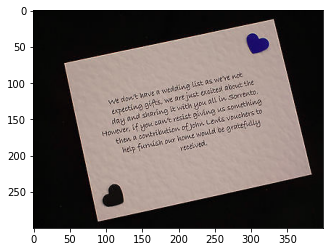

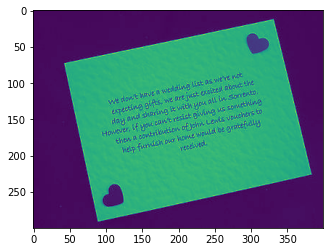

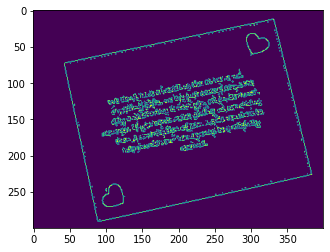

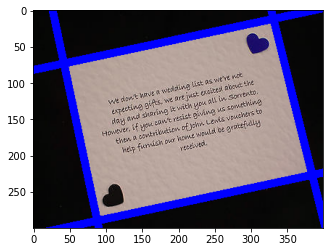

In [57]:
#Utilizando a imagem 004 da base1 para teste
imagem_base = "base1/004.jpg"
img = cv2.imread(imagem_base)
show_img(img)

#Guardando altura, largura e canais de cores
altura_img, largura_img, canal_cor_img = get_data_img(img)
largura_img = img.shape[1]
canal_cor_img = img.shape[2]

#Mostrando os respectivos dados da imagem
show_data_img(altura_img, largura_img, canal_cor_img)

#Alterando a img para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img_gray)

#Encontrando as bordas
bordas_img = cv2.Canny(img_gray, 50, 150, apertureSize=3)
show_img(bordas_img)

lines_img = transform_hough(4, bordas_img)
print("Quantidade de linhas encontrada: %d" %(len(lines_img)))
retas = lines_on_img(lines_img, img)
print(len(retas))
#print(retas)
intersecoes = get_pontos_intersec(retas)
print("Intersecoes encontradas: ")
print(intersecoes)

pontos = order_points(intersecoes)
pts2 = np.float32([[0,0], [400,0], [0,600], [400, 600]])
print("Pontos ordenados: ")
print(pontos)
M = cv2.getPerspectiveTransform(pts2, pontos)
print("MATRIZ: ")
print(M)
warp = cv2,warPerspective(img, M, (400, 300))



